# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

# 1. Zrozumienie i wczytanie danych

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# wczytanie danych
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [41]:
# zmienne pomocnicze co by nie szukać po całym pliku

# pierwsza litera kabiny, to pokład
df['deck'] = df['cabin'].str[0] 

# dzieci to osoby poniżej 16 roku życia
df['is_child'] = df['age'] < 16



In [42]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,deck,is_child
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B,False
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C,True
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C,True
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C,False
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C,False


In [43]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,deck,is_child
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,False
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,NaN,False
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,NaN,False
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,NaN,False
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [44]:
# próbka 10 losowych rekordów
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,deck,is_child
209,1.0,1.0,"Mock, Mr. Philipp Edmund",male,30.0,1.0,0.0,13236,57.7500,C78,C,11,NaN,"New York, NY",C,False
633,3.0,0.0,"Andreasson, Mr. Paul Edvin",male,20.0,0.0,0.0,347466,7.8542,NaN,S,NaN,NaN,"Sweden Chicago, IL",NaN,False
89,1.0,0.0,"Davidson, Mr. Thornton",male,31.0,1.0,0.0,F.C. 12750,52.0000,B71,S,NaN,NaN,"Montreal, PQ",B,False
746,3.0,1.0,"Daly, Mr. Eugene Patrick",male,29.0,0.0,0.0,382651,7.7500,NaN,Q,13 15 B,NaN,"Co Athlone, Ireland New York, NY",NaN,False
466,2.0,0.0,"Kantor, Mr. Sinai",male,34.0,1.0,0.0,244367,26.0000,NaN,S,NaN,283.0,"Moscow / Bronx, NY",NaN,False
1115,3.0,0.0,"Pedersen, Mr. Olaf",male,NaN,0.0,0.0,345498,7.7750,NaN,S,NaN,NaN,NaN,NaN,False
214,1.0,1.0,"Newell, Miss. Marjorie",female,23.0,1.0,0.0,35273,113.2750,D36,C,6,NaN,"Lexington, MA",D,False
700,3.0,0.0,"Calic, Mr. Jovo",male,17.0,0.0,0.0,315093,8.6625,NaN,S,NaN,NaN,NaN,NaN,False
997,3.0,1.0,"Masselmani, Mrs. Fatima",female,NaN,0.0,0.0,2649,7.2250,NaN,C,C,NaN,NaN,NaN,False
1278,3.0,0.0,"Vendel, Mr. Olof Edvin",male,20.0,0.0,0.0,350416,7.8542,NaN,S,NaN,NaN,NaN,NaN,False


# 2. Podstawowe podsumowanie

<div style="text-align: center;">

  <div style="font-weight:bold; font-size:28px; margin-bottom:15px;">RMS Titanic</div>

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" width="500" style="display: block; margin: 0 auto;" /><br>

  "Titanic" to brytyjski statek pasażerski, który zatonął w nocy z 14 na 15 kwietnia 1912 roku po zderzeniu z górą lodową podczas swojego dziewiczego rejsu.<br>
  Katastrofa ta pochłonęła życie ponad 1500 osób i jest jedną z najsłynniejszych tragedii morskich w historii.

</div>

In [45]:
# typy danych
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
deck          object
is_child        bool
dtype: object

In [46]:
# opis statystyczny danych
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [47]:
# unikalne wartości w kolumnie
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
deck            8
is_child        2
dtype: int64

In [48]:
# liczba braków w każdej kolumnie
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
deck         1015
is_child        0
dtype: int64

#### dane nie są kompletne, brakuje wielu informacji na temat przydziału kabin, wieku, numeru łodzi ewakuacyjnej itd.

In [49]:
df[df.duplicated(keep=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,deck,is_child


#### brak duplikatów

# 3. Analiza pojedynczych kolumn

<Axes: ylabel='pclass'>

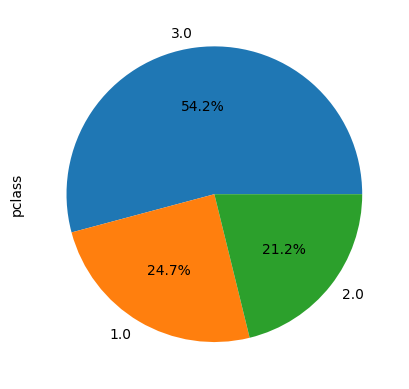

In [92]:
# liczba pasażerów w każdej klasie
df['pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='survived'>

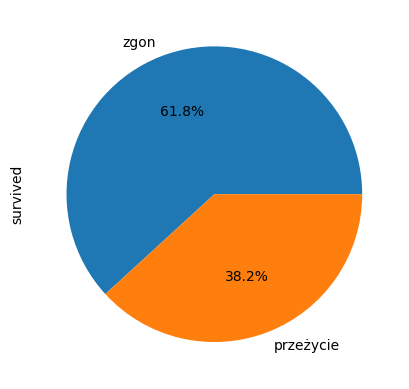

In [51]:
# liczba przeżyłych i zgonów
df['survived'].map({0.0: 'zgon', 1.0: 'przeżycie'}).value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='sex'>

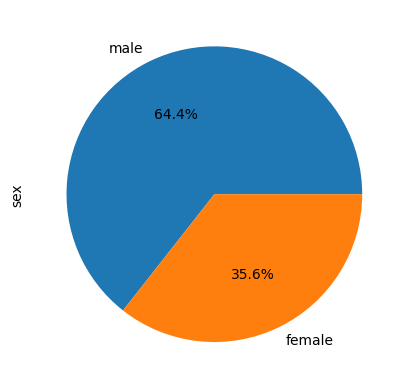

In [91]:
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [53]:
# statystyka ceny biletu
df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [54]:
# średnia cena biletu dla każdego pokładu
df.groupby('deck')['fare'].median().sort_values()

deck
F    13.0000
G    16.7000
A    35.0771
T    35.5000
D    52.5542
E    53.1000
B    82.2667
C    86.2896
Name: fare, dtype: float64

<Axes: ylabel='Frequency'>

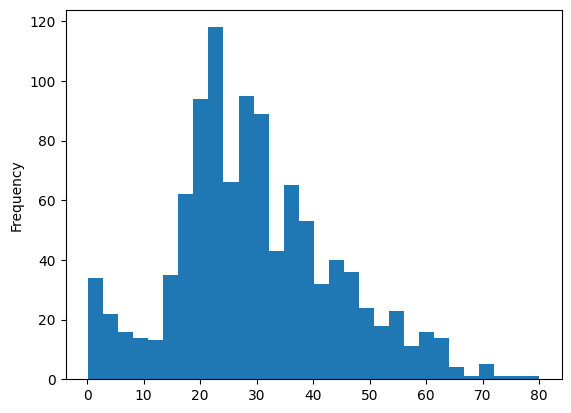

In [66]:
# wiek
df['age'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

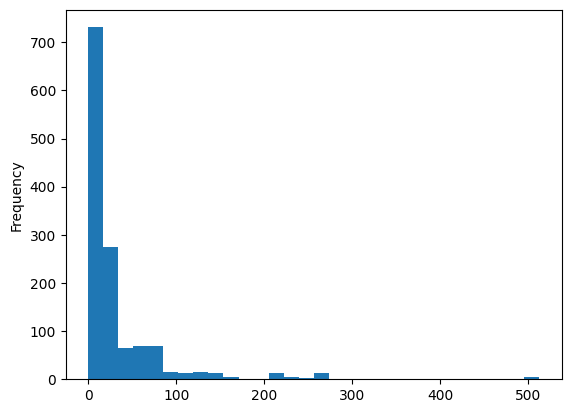

In [67]:
# cena biletu
df['fare'].plot.hist(bins=30)

<Axes: >

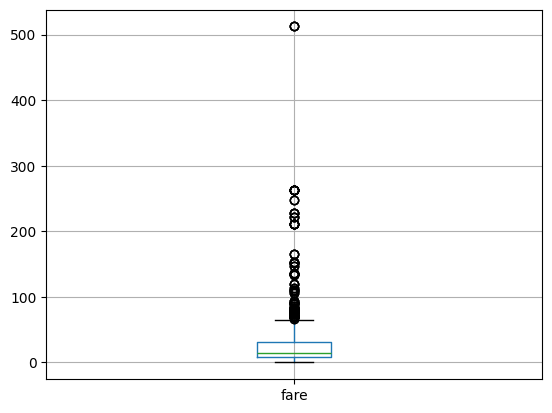

In [70]:
# widać outliers w cene biletu
df.boxplot(column='fare')

#### średnia cena biletu dla pokładu B i C to 80$, bilety były nawet po 500$ ale podejrzewam że to ze względu na to, że bogatsi kupili więcej niz jedną kabinę jak w przypadku jegomościa poniżej który zafundował sobie z żoną aż trzy sztuki

# 4. Analiza relacji i zależności

In [57]:
df.corr()

C:\Users\pawlo\AppData\Local\Temp\ipykernel_32988\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,pclass,survived,age,sibsp,parch,fare,body,is_child
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642,0.119508
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN,0.122602
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809,-0.568241
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961,0.343746
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099,0.320391
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110,0.002190
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000,-0.115567
is_child,0.119508,0.122602,-0.568241,0.343746,0.320391,0.002190,-0.115567,1.000000


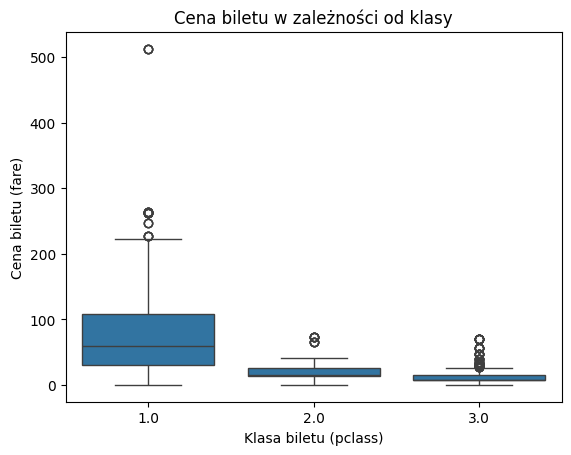

In [71]:

sns.boxplot(x='pclass', y='fare', data=df)
plt.xlabel('Klasa biletu (pclass)')
plt.ylabel('Cena biletu (fare)')
plt.title('Cena biletu w zależności od klasy')
plt.show()

## widać na boxplocie kilku zarobasów, których bilety kosztowały najwięcej, poniżej sprawdźmy czy przeżyli

In [72]:
df_high_fare = df[df['fare'] >500]
df_high_fare.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,deck,is_child
49,1.0,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",B,False
50,1.0,1.0,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",B,False
183,1.0,1.0,"Lesurer, Mr. Gustave J",male,35.0,0.0,0.0,PC 17755,512.3292,B101,C,3,NaN,NaN,B,False
302,1.0,1.0,"Ward, Miss. Anna",female,35.0,0.0,0.0,PC 17755,512.3292,NaN,C,3,NaN,NaN,NaN,False


### jak widać 100% przeżyło, pieniądze szcześcia nie dają ale otwierają wiele możliwości.

<div style="text-align: center;">

<div style= "font-weight:bold; font-size:28px; margin-bottom:15px;" >Rozkład kabin w Titanicu</div>

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEi5MupOJ12etxCCOUAF-P58C5JqBDv6JIBEkCLsdIzefSeYaDrVcdECNia9EPmBMNXFkG1jEwLRhVmFJdo-6nQWGJ4Un7_vhGBjmNzd1YYZ5bRzU7SnG0hyrI0sybZBapjPlvrRhDOoUtg/s1600/Titanic_side_plan_annotated_English.png" width=2000 /><br>
Po prawej stronie mamy opis "BOAT DECK" na którym widać oznaczenie pokładów. Im wyżej tym drożej...

</div>

### zobaczmy ogólnie jak się ma cena do przeżywalności

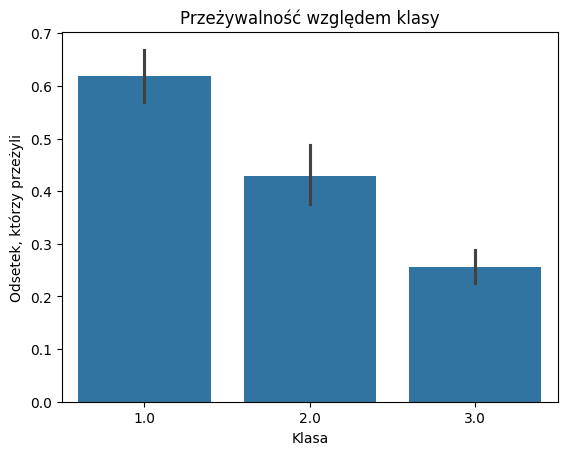

In [73]:

sns.barplot(x='pclass', y='survived', data=df)
plt.ylabel('Odsetek, którzy przeżyli')
plt.xlabel('Klasa')
plt.title('Przeżywalność względem klasy')
plt.show()

#### klasyka gatunku, im grubszy portfel tym więcej możliwości

### teraz sprawdźmy jak się ma oznaczenie pokładu do przeżycia...

C:\Users\pawlo\AppData\Local\Temp\ipykernel_32988\62792947.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y*100) for y in yticks])


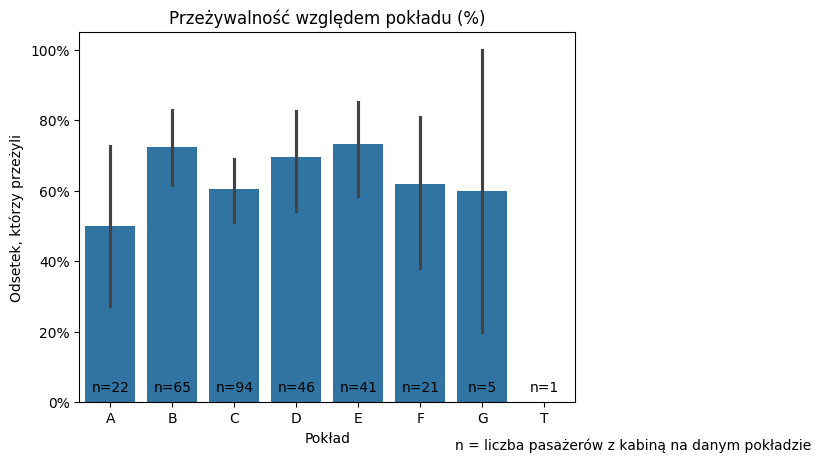

In [74]:

# Ustal alfabetyczny porządek pokładów (bez NaN)
deck_order = sorted(df['deck'].dropna().unique())

# Wykres z seaborn — wartości survived od razu mean (czyli procent)
ax = sns.barplot(x='deck', y='survived', data=df, order=deck_order)

# Oś Y: procenty
yticks = ax.get_yticks()
ax.set_yticklabels(['{:.0f}%'.format(y*100) for y in yticks])

plt.ylabel('Odsetek, którzy przeżyli')
plt.xlabel('Pokład')
plt.title('Przeżywalność względem pokładu (%)')

# Liczba biletów n
deck_counts = df['deck'].value_counts().reindex(deck_order)
for i, count in enumerate(deck_counts):
    ax.text(i, 0.02, f'n={count}', ha='center',
            va='bottom', color='black', fontsize=10)
plt.figtext(0.99, 0.01, "n = liczba pasażerów z kabiną na danym pokładzie",
            horizontalalignment='center', fontsize=10, color='black')
plt.show()

#### i tu niespodzianka. Niższe pokłady mają większą przeżywalność czego się nie spodziewałem (ale doczytałem, że ludzie z niższych pokładów skakali do opuszczanych szalup), sprawdzmy więc rozkład kobiet, dzieci i mężczyzn ponieważ podczas ewakuacji pierwszeństwo miały kobiety i dzieci.

In [80]:
# grupujemy po pokładzie i liczymy ilość osób, mężczyzn, kobiet i dzieci
def group_deck(df):
    return pd.Series({
        'liczba osób': len(df),
        'mężczyźni': ((df['sex'] == 'male') & (~df['is_child'])).sum(),
        'kobiety': ((df['sex'] == 'female') & (~df['is_child'])).sum(),
        'dzieci': df['is_child'].sum()
    })

deck_summary = df.groupby('deck').apply(group_deck).sort_index()
deck_summary.reset_index(inplace=False)

,deck,liczba osób,mężczyźni,kobiety,dzieci
0,A,22,17,4,1
1,B,65,27,34,4
2,C,94,47,45,2
3,D,46,23,23,0
4,E,41,20,19,2
5,F,21,10,6,5
6,G,5,0,2,3
7,T,1,1,0,0


#### sprawdźmy przeżywalność kobiet i dzieci na poszczególnych pokładach

In [98]:
def group_deck_survived(df_deck):
    # Dorośli: wiek >= 16
    dorosle_kobiety = ((df_deck['sex'] == 'female') & (~df_deck['is_child']))
    dorosli_mezczyzni = ((df_deck['sex'] == 'male') & (~df_deck['is_child']))
    dzieci = df_deck['is_child']
    przezyly_kobiety = (dorosle_kobiety & (df_deck['survived'] == 1)).sum()
    przezyli_mezczyzni = (dorosli_mezczyzni & (df_deck['survived'] == 1)).sum()
    przezylo_dzieci = (dzieci & (df_deck['survived'] == 1)).sum()
    return pd.Series({
        'liczba mężczyzn': dorosli_mezczyzni.sum(),
        'liczba ocalałych mężczyzn': przezyli_mezczyzni,
        'liczba kobiet': dorosle_kobiety.sum(),        
        'liczba ocalałych kobiet': przezyly_kobiety,
        'liczba dzieci': dzieci.sum(),
        'liczba ocalałych dzieci': przezylo_dzieci
    })


deck_survival = df.groupby('deck').apply(group_deck_survived).sort_index()

deck_survival['przeżywalność mężczyzn %'] = (
    deck_survival['liczba ocalałych mężczyzn'] /
    deck_survival['liczba mężczyzn'] * 100
)

deck_survival['przeżywalność kobiet %'] = (
    deck_survival['liczba ocalałych kobiet'] /
    deck_survival['liczba kobiet'] * 100
)
deck_survival['przeżywalność dzieci %'] = (
    deck_survival['liczba ocalałych dzieci'] /
    deck_survival['liczba dzieci'] * 100
)
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
print(deck_survival.reset_index())

  deck  liczba mężczyzn  liczba ocalałych mężczyzn  liczba kobiet  liczba ocalałych kobiet  \
0    A               17                          7              4                        3   
1    B               27                          9             34                       34   
2    C               47                         14             45                       42   
3    D               23                          9             23                       23   
4    E               20                         10             19                       18   
5    F               10                          2              6                        6   
6    G                0                          0              2                        1   
7    T                1                          0              0                        0   

   liczba dzieci  liczba ocalałych dzieci  przeżywalność mężczyzn %  przeżywalność kobiet %  \
0              1                        1                 

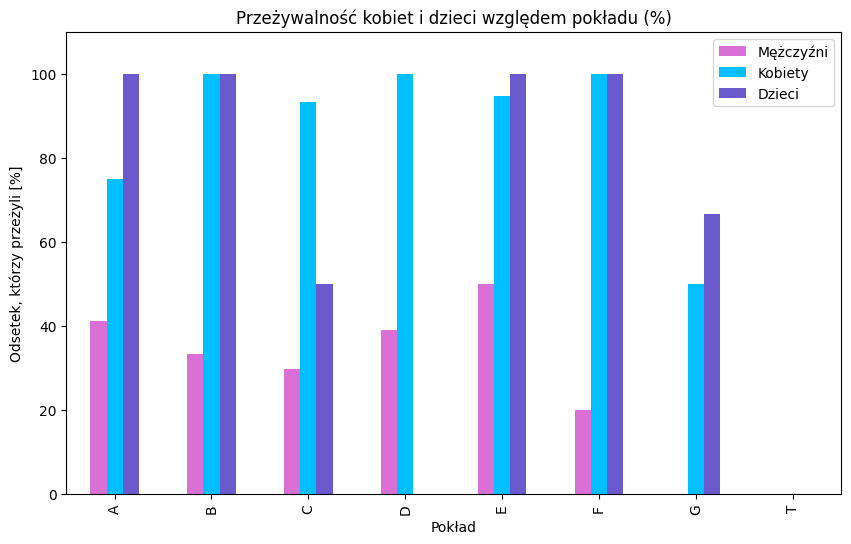

In [64]:

deck_survival[['przeżywalność mężczyzn %', 'przeżywalność kobiet %', 'przeżywalność dzieci %']].plot(
    kind='bar', figsize=(10, 6), color=['orchid', 'deepskyblue', 'slateblue']
)
plt.ylabel('Odsetek, którzy przeżyli [%]')
plt.xlabel('Pokład')
plt.title('Przeżywalność kobiet i dzieci względem pokładu (%)')
plt.legend(['Mężczyźni','Kobiety', 'Dzieci' ])
plt.ylim(0, 110)
plt.show()

#### widać w tamtych czasach było dużo dżentelmenów albo dużo brytyjczyków na statku

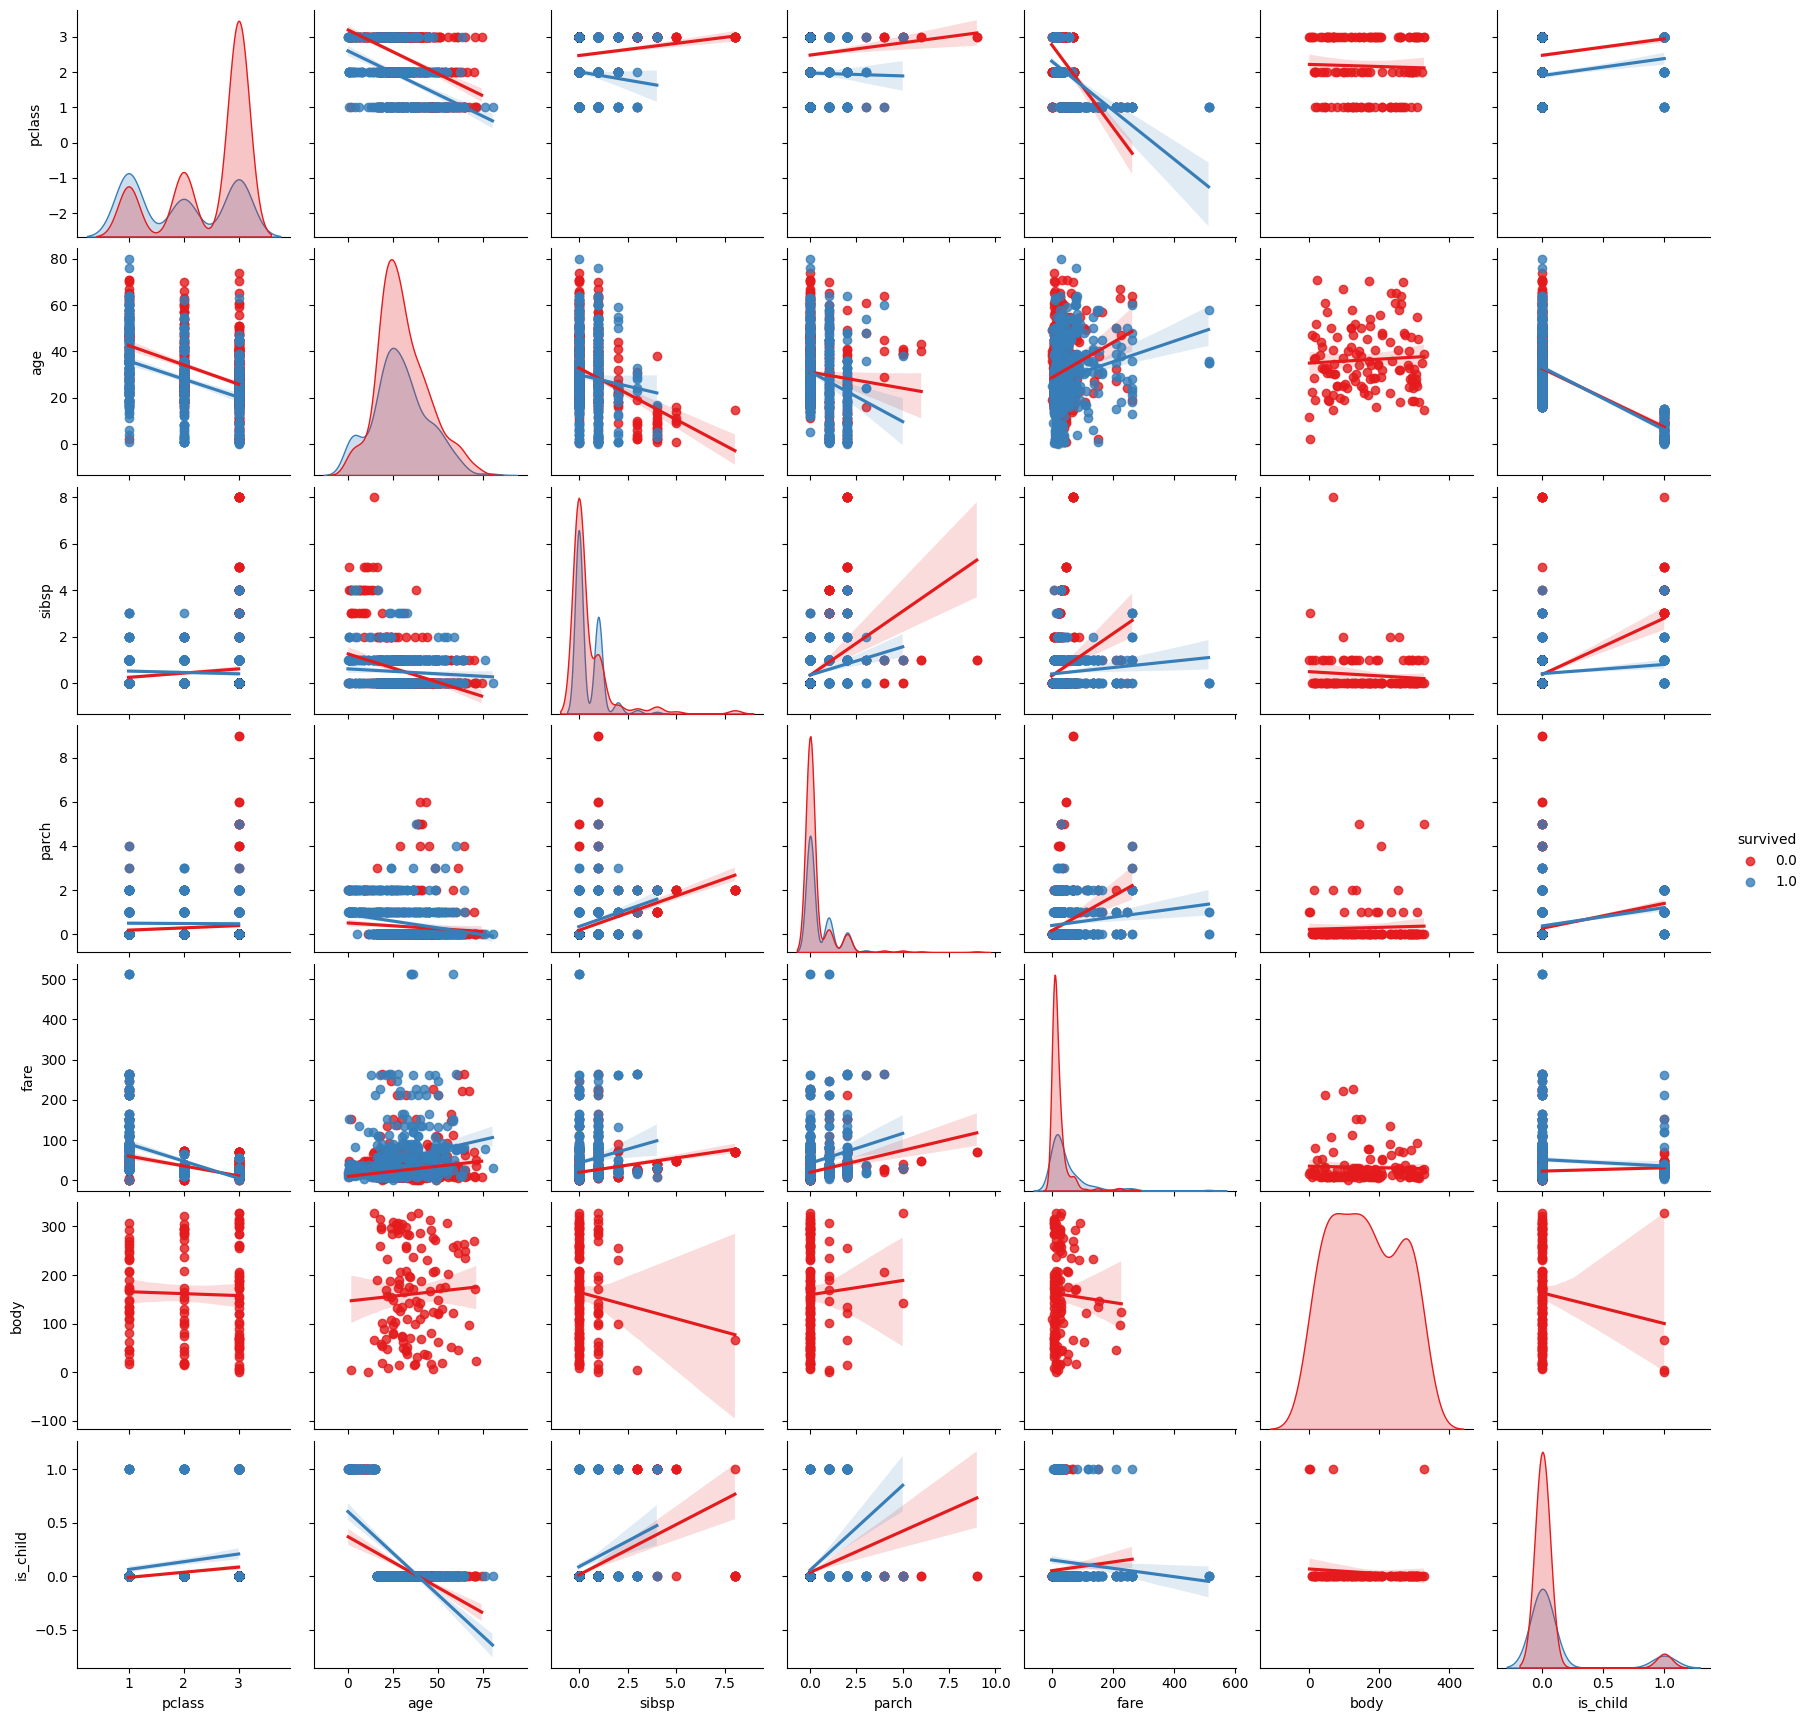

In [85]:
sns.pairplot(df, hue='survived', kind='reg', diag_kind='kde', palette='Set1')

C:\Users\pawlo\AppData\Local\Temp\ipykernel_32988\4004775697.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


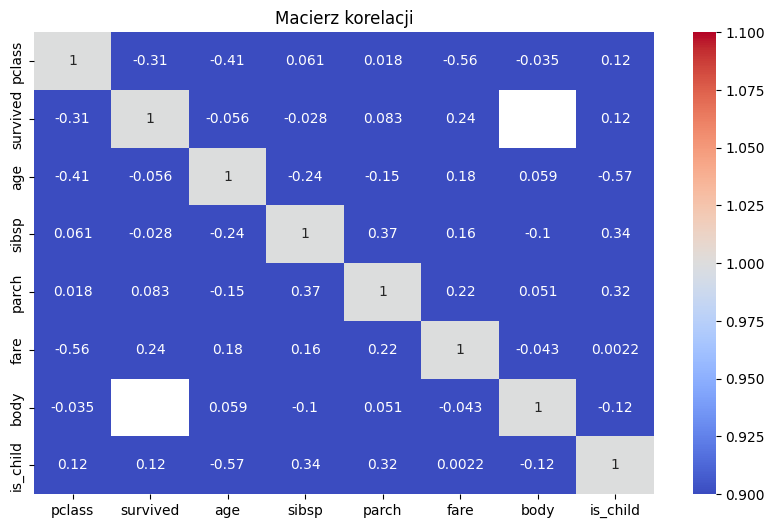

In [90]:
corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title('Macierz korelacji')
plt.show()

# WNIOSKI Z ANALIZY DANYCH TITANICA
## 1. Ogólne wnioski o przeżywalności
Klasa społeczna miała kluczowe znaczenie - pasażerowie pierwszej klasy mieli znacznie większe szanse na przeżycie niż pasażerowie trzeciej klasy
Płeć była decydującym czynnikiem - kobiety miały znacznie większe szanse na przeżycie niż mężczyźni (zasada "kobiety i dzieci pierwsze")
Dzieci były priorytetem - miały wysoką przeżywalność na większości pokładów
## 2. Wnioski dotyczące pokładów
Niższe pokłady wykazywały wyższą przeżywalność niż oczekiwano
Pokład B - najwyższa przeżywalność kobiet (100%) i dzieci (100%)
Pokład E - najlepsza przeżywalność mężczyzn (50%)
Pokład F - wysoka przeżywalność kobiet i dzieci (100%)
Pokład G - najniższa przeżywalność ogólnie
## 3. Wnioski dotyczące ceny biletu
Korelacja między ceną biletu a przeżywalnością - droższe bilety oznaczały większe szanse na przeżycie
Pasażerowie z biletami >500$ - 100% przeżywalność
Outliers w cenach - niektórzy pasażerowie kupowali kilka kabin (np. 3 kabiny dla jednej osoby)
## 4. Wnioski społeczne i historyczne
Zasada "kobiety i dzieci pierwsze" była rzeczywiście stosowana podczas ewakuacji
Klasa społeczna determinowała dostęp do łodzi ratunkowych
Dżentelmeństwo epoki - mężczyźni ustępowali miejsca kobietom i dzieciom
Bogactwo dawało przewagę - nie tylko w komforcie podróży, ale także w szansach na przeżycie
## 5. Wnioski techniczne z analizy
Dane nie są kompletne - brakuje informacji o kabinach, wieku, numerach łodzi
Brak duplikatów - dane są czyste pod względem duplikacji
Występują outliers - szczególnie w cenach biletów i wieku pasażerów
## 6. Kluczowe czynniki przeżywalności (w kolejności ważności)
Płeć - kobiety miały największe szanse
Klasa biletu - pierwsza klasa = większe szanse
Wiek - dzieci były priorytetem
Pokład - wyższe pokłady = lepsze szanse
Cena biletu - droższe bilety = większe szanse
## 7. Konkluzja końcowa
Katastrofa Titanica pokazała, że nawet w obliczu śmierci hierarchia społeczna i zasady moralne epoki były respektowane. Bogactwo i status społeczny nie tylko zapewniały komfort podróży, ale także realnie wpływały na szanse przeżycia. Jednocześnie zasada "kobiety i dzieci pierwsze" była rzeczywiście stosowana, co świadczy o dżentelmeństwie tamtych czasów, mimo tragicznych okoliczności.